## 라이브러리
- 영화 리뷰 텍스트를 긍정 or 부정으로 분류 
- 이진 또는 클래스가 두개인 분류 문제 
- 훈련용, 테스트용 데이터 개수는 동일하고 긍정적, 부정적 리뷰도 동일 

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

## IMDB 데이터넷 다운로드
- 리뷰 데이터는 전처리가 이미 되어 있어서 정수로 구성 

In [2]:
imdb=keras.datasets.imdb
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant

## 데이터 탐색
- 레이블은 0 또는 1 -> 0은 부정적인 리뷰, 1은 긍정적인 리뷰 

In [3]:
print(len(train_data),len(train_labels))

25000 25000


- 첫번째 리뷰 확인

In [4]:
print(train_data[0])  #첫번째 리뷰의 특정 단어를 나타내는 정수로 변환

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


- 영화 리뷰 길이가 다름 -> 신경망 입력은 길이가 같아야 해서 맞춰줘야 함 

In [5]:
len(train_data[0]), len(train_data[1])

(218, 189)

## 정수를 단어로 다시 변환하기
- 정수와 문자열을 매핑한 딕셔너리 객체에 질의하는 헬퍼 함수 생성

In [5]:
word_index=imdb.get_word_index() 
#단어 : 정수 인덱스 매핑한 딕셔너리 


#단어 4개를  추가하기 위해 인덱스 변경
word_index={k:(v+3) for k,v in word_index.items()}  
word_index['<PAD>']=0
word_index['<START>']=1
word_index['<UNK>']=2
word_index['<UNUSED>']=3

#인덱스와 단어 순서 변경
reverse_word_index=dict([(value,key) for (key,value) in word_index.items()])

In [4]:
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [9]:
len(word_index)

88588

In [17]:
reverse_word_index

{34704: 'fawn',
 52009: 'tsukino',
 52010: 'nunnery',
 16819: 'sonja',
 63954: 'vani',
 1411: 'woods',
 16118: 'spiders',
 2348: 'hanging',
 2292: 'woody',
 52011: 'trawling',
 52012: "hold's",
 11310: 'comically',
 40833: 'localized',
 30571: 'disobeying',
 52013: "'royale",
 40834: "harpo's",
 52014: 'canet',
 19316: 'aileen',
 52015: 'acurately',
 52016: "diplomat's",
 25245: 'rickman',
 6749: 'arranged',
 52017: 'rumbustious',
 52018: 'familiarness',
 52019: "spider'",
 68807: 'hahahah',
 52020: "wood'",
 40836: 'transvestism',
 34705: "hangin'",
 2341: 'bringing',
 40837: 'seamier',
 34706: 'wooded',
 52021: 'bravora',
 16820: 'grueling',
 1639: 'wooden',
 16821: 'wednesday',
 52022: "'prix",
 34707: 'altagracia',
 52023: 'circuitry',
 11588: 'crotch',
 57769: 'busybody',
 52024: "tart'n'tangy",
 14132: 'burgade',
 52026: 'thrace',
 11041: "tom's",
 52028: 'snuggles',
 29117: 'francesco',
 52030: 'complainers',
 52128: 'templarios',
 40838: '272',
 52031: '273',
 52133: 'zaniacs',

In [26]:
#새로운 텍스트에서 i번쨰 인덱스에 해당하는 단어를 조인 함수로 결합 
#get 함수는 키-인덱스 값을 이용해서 value값을 출력 

def decode_review(text):
    return ' '.join([reverse_word_index.get(i) for i in text])


In [27]:
reverse_word_index.get(222)

'least'

In [29]:
decode_review(train_data[11])

"<START> when i rented this movie i had very low expectations but when i saw it i realized that the movie was less a lot less than what i expected the actors were bad the doctor's wife was one of the worst the story was so stupid it could work for a disney movie except for the murders but this one is not a comedy it is a laughable masterpiece of stupidity the title is well chosen except for one thing they could add stupid movie after dead husbands i give it 0 and a half out of 5"

## 데이터 준비
- 신경망에 입력 전 텐서로 변환 필요 
- 변환방법
    1. 원-핫 인코딩 : 0과 1로 이루어진 벡터 변환
    2. pad_sequence 함수 :  pad_sequence()는 정해준 길이보다 길이가 긴 샘플은 값을 일부 자르고, 정해준 길이보다 길이가 짧은 샘플은 값을 0으로 채웁니다.
    3.첫번째 인자 = 패딩을 진행할 데이터
    4.maxlen = 모든 데이터에 대해서 정규화 할 길이
    5.padding = 'pre'를 선택하면 앞에 0을 채우고 'post'를 선택하면 뒤에 0을 채움.

In [30]:
train_data=keras.preprocessing.sequence.pad_sequences(train_data,
                                            value=word_index['<PAD>'],
                                                     padding='post',
                                                     maxlen=256)
test_data=keras.preprocessing.sequence.pad_sequences(test_data,
                                                     value=word_index['<PAD>'],
                                                    padding='post',maxlen=256)

In [31]:
train_data[0]

array([   1,   14,   22,   16,   43,  530,  973, 1622, 1385,   65,  458,
       4468,   66, 3941,    4,  173,   36,  256,    5,   25,  100,   43,
        838,  112,   50,  670,    2,    9,   35,  480,  284,    5,  150,
          4,  172,  112,  167,    2,  336,  385,   39,    4,  172, 4536,
       1111,   17,  546,   38,   13,  447,    4,  192,   50,   16,    6,
        147, 2025,   19,   14,   22,    4, 1920, 4613,  469,    4,   22,
         71,   87,   12,   16,   43,  530,   38,   76,   15,   13, 1247,
          4,   22,   17,  515,   17,   12,   16,  626,   18,    2,    5,
         62,  386,   12,    8,  316,    8,  106,    5,    4, 2223, 5244,
         16,  480,   66, 3785,   33,    4,  130,   12,   16,   38,  619,
          5,   25,  124,   51,   36,  135,   48,   25, 1415,   33,    6,
         22,   12,  215,   28,   77,   52,    5,   14,  407,   16,   82,
          2,    8,    4,  107,  117, 5952,   15,  256,    4,    2,    7,
       3766,    5,  723,   36,   71,   43,  530,  4

In [32]:
len(train_data[0])

256

## 모델 구성
- 층을 몇개로 할 건지
- 각 층에서 몇 개의 은닉 유닛을 사용할 건지
- GlobalAveragePooling1D: 고정된 크기(여기에선 16)의 출력 벡터를 리턴합니다. 

In [33]:
# 입력 크기는 영화 리뷰 데이터셋에 적용된 어휘 사전의 크기입니다(10,000개의 단어)
vocab_size=10000

model=keras.Sequential()
model.add(keras.layers.Embedding(vocab_size,16,input_shape=(None,)))
# 16은 생성된 임베딩 벡터의 크기 
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


- 손실함수와 옵티마이저
- 모델이 확률을 출력하므로 binarybinary_crossentropy 손실함수 사용 

In [35]:
model.compile(optimizer='adam', loss='binary_crossentropy',
             metrics=['accuracy'])


- 검증 세트 만들기

In [36]:
x_val=train_data[:10000]
partial_x_train=train_data[10000:]

y_val=train_labels[:10000]
partial_y_train=train_labels[10000:]

## 모델 훈련

In [38]:
history=model.fit(partial_x_train,
                 partial_y_train,
                 epochs=40,
                 batch_size=512,
                 validation_data=(x_val,y_val),
                 verbose=1)

Epoch 1/40
30/30 [==============================] - 7s 102ms/step - loss: 0.6928 - accuracy: 0.5043 - val_loss: 0.6911 - val_accuracy: 0.6522
Epoch 2/40
30/30 [==============================] - 2s 71ms/step - loss: 0.6896 - accuracy: 0.6821 - val_loss: 0.6844 - val_accuracy: 0.7167
Epoch 3/40
30/30 [==============================] - 2s 57ms/step - loss: 0.6803 - accuracy: 0.7412 - val_loss: 0.6705 - val_accuracy: 0.7523
Epoch 4/40
30/30 [==============================] - 1s 45ms/step - loss: 0.6631 - accuracy: 0.7757 - val_loss: 0.6481 - val_accuracy: 0.7585
Epoch 5/40
30/30 [==============================] - 3s 89ms/step - loss: 0.6364 - accuracy: 0.7804 - val_loss: 0.6153 - val_accuracy: 0.7875
Epoch 6/40
30/30 [==============================] - 2s 51ms/step - loss: 0.5963 - accuracy: 0.8019 - val_loss: 0.5732 - val_accuracy: 0.8031
Epoch 7/40
30/30 [==============================] - 1s 43ms/step - loss: 0.5488 - accuracy: 0.8239 - val_loss: 0.5276 - val_accuracy: 0.8174
Epoch 8/40
3

## 모델 평가

In [39]:
results=model.evaluate(test_data,test_labels,verbose=2)
results

782/782 - 2s - loss: 0.3308 - accuracy: 0.8721


[0.33084526658058167, 0.8720800280570984]

## 정확도와 손실 그래프 그리기

In [40]:
history_dict=history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

- 훈련 정확도 그래프

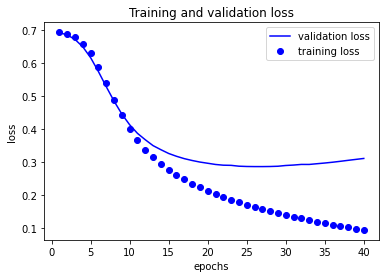

In [45]:
import matplotlib.pyplot as plt

acc=history_dict['accuracy']
val_accuracy=history_dict['val_accuracy']
loss=history_dict['loss']
val_loss=history_dict['val_loss']

epochs=range(1,len(acc)+1)

plt.plot(epochs,val_loss,'b',label='validation loss')
plt.plot(epochs,loss,'bo',label='training loss')
plt.title('Training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

- 검증 정확도 그래프

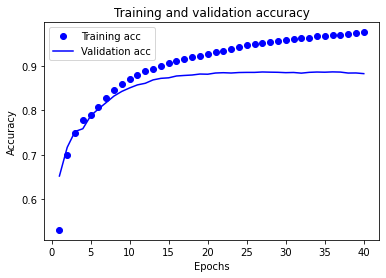

In [47]:
plt.clf()   # 그래프 초기화 

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()